# Project 1: Solving Kepler's Equation

### Task 1

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt 
import array as arr
import sympy as sym
import matplotlib.ticker as tck
from scipy.misc import derivative
from sympy.plotting import plot
import scipy.special as scipy

In [3]:
eccentricity=[0.1, 0.3, 0.5, 0.7, 0.9]

In [4]:
accuracy=10^(-15)

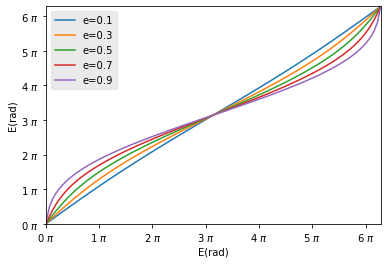

In [5]:
M = [j for j in np.linspace(0,2*math.pi,100)]
E=[0]*100
def f(E):
    return j-E[k]+e*math.sin(E[k])

def df(E):
    return -1+e*math.cos(E[k])

for e in eccentricity:
    k=0
    for j in M:
        E[k]=j
        for i in range(100):
            Enew=E[k]-f(E)/df(E)
            if abs(E[k]-Enew)<accuracy:
                break;
            else:
                E[k]=Enew
        k=k+1
    plot1=plt.plot(M,E)
    plt.ylabel('E(rad)')
    plt.xlabel('E(rad)')
    plt.legend(['e=0.1','e=0.3','e=0.5','e=0.7','e=0.9'])
    plt.xlim(0,2*math.pi)
    plt.ylim(0,2*math.pi)
    ax=plt.gca()
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    plt.style.use("ggplot")

plt.show()

### Task 2

In [6]:
del E, M, e

For n=3: E= M - e**3*(3*sin(M)**2 - 2)*sin(M)/2 + e**2*sin(2*M)/2 + e*sin(M)

For n=10: E= M + e**10*(11003120*sin(M)**8 - 16269696*sin(M)**6 + 5842368*sin(M)**4 + 1496880*cos(M)**8 - 1451520*cos(M)**6)*sin(2*M)/90720 + e**9*(3801849*sin(M)**8 - 6336800*sin(M)**6 + 2582496*sin(M)**4 + 981120*cos(M)**8 - 940800*cos(M)**6)*sin(M)/40320 - e**8*(16069*sin(M)**6 - 19257*sin(M)**4 + 5145*sin(M)**2 - 315*cos(M)**6)*sin(M)*cos(M)/315 + e**7*(-16087*sin(M)**7 + 23346*sin(M)**5 - 7800*sin(M)**3 + 720*sin(M)*cos(M)**6)/720 + e**6*(162*sin(M)**4 - 130*sin(M)**2 + 15)*sin(M)*cos(M)/15 + e**5*(125*sin(M)**4 - 136*sin(M)**2 + 24)*sin(M)/24 + e**4*(-sin(2*M) + 2*sin(4*M))/6 - e**3*(3*sin(M)**2 - 2)*sin(M)/2 + e**2*sin(2*M)/2 + e*sin(M)


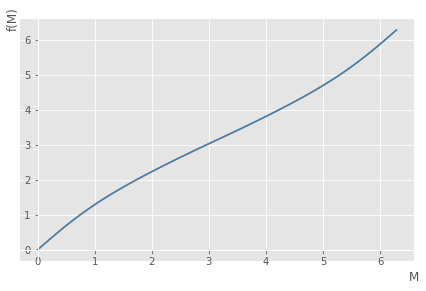

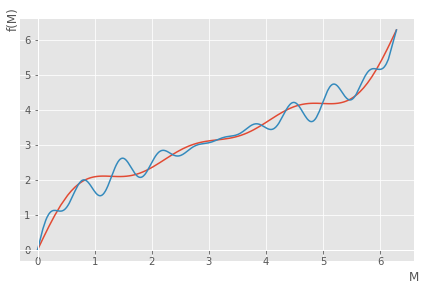

In [7]:
def Epsilon(M,e,n):
    sum1=0;
    for i in range(1,n+1):
        sum1+=(e**i/sym.factorial(i))*sym.diff(sym.sin(M)**i,M,i-1)
    E=M+sum1
    return E
M=sym.Symbol('M')
e=sym.Symbol('e')
n=sym.Symbol('n')

#Όροι μέχρι n=3
L1=Epsilon(M,e,3)
L1=sym.trigsimp(L1)
L1=sym.simplify(L1)
print("For n=3: E=",L1)

#Όροι μέχρι n=10
L2=Epsilon(M,e,10)
L2=sym.trigsimp(L2)
L2=sym.simplify(L2)
print("\nFor n=10: E=",L2)
#δεν βγαίνει η μορφή που ζητάει η άσκηση

K1=Epsilon(M,0.3,3)
K2=Epsilon(M,0.3,10)
K3=Epsilon(M,0.9,3)
K4=Epsilon(M,0.9,10)

plot2=plot(K1,K2,(M,0,2*math.pi))
#Παρατηρούμε ότι η μέθοδος του Lagrange προσσεγγίζει πολύ καλά τις πραγματικές τιμές για e=0.3, αν θεωρήσουμε ότι οι πραγματικές
#είναι αυτές που βρέθηκαν προηγουμένως με τη μέθοδο Newton-Raphson, καθώς για n=3 και n=10 ταυτίζονται.

sym.plot(K3,K4,(M,0,2*math.pi))
#Σε αντίθεση με πριν οι τιμές για e=0.9 αποκλίνουν αρκετά από τις πραγματικές και το περίεργο είναι ότι όσο αυξάνεται ο βαθμός
#του πολυωνύμου τόσο πιο πολύ ταλαντώνεται η λύση γύρω από την πραγματική.

#Άρα η μέθοδος του Lagrage έχει καλύτερα αποτελέσματα για μικρές εκκεντρότητες.

### Task 3

In [8]:
del n
del M

Text(0.5, 1.0, 'Python Bessel functions')

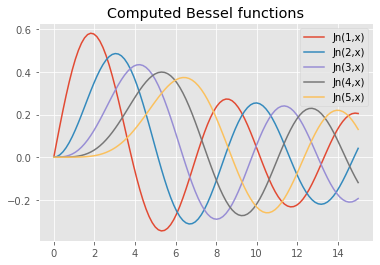

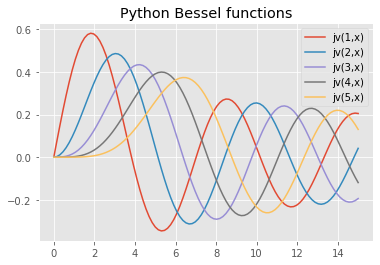

In [9]:
def Jn(n,th):
    J=0
    for i in range(0,100):
        J+=((-1)**i/(np.math.factorial(i)*np.math.factorial(n+i)))*(th/2)**(n+2*i) 
    return J
x = np.linspace(0,15,100)
plt.figure()
plt.plot(x,Jn(1,x))
plt.plot(x,Jn(2,x))
plt.plot(x,Jn(3,x))
plt.plot(x,Jn(4,x))
plt.plot(x,Jn(5,x))
plt.legend(['Jn(1,x)','Jn(2,x)','Jn(3,x)','Jn(4,x)','Jn(5,x)'])
plt.title('Computed Bessel functions')

plt.figure()
plt.plot(x,scipy.jv(1,x))
plt.plot(x,scipy.jv(2,x))
plt.plot(x,scipy.jv(3,x))
plt.plot(x,scipy.jv(4,x))
plt.plot(x,scipy.jv(5,x))
plt.legend(['jv(1,x)','jv(2,x)','jv(3,x)','jv(4,x)','jv(5,x)'])
plt.title('Python Bessel functions')

#Παρακάτω παρατητούμε την ομοιότητα των εσωτερικών συναρτήσεων Bessel με αυτές που υπολογίστηκαν

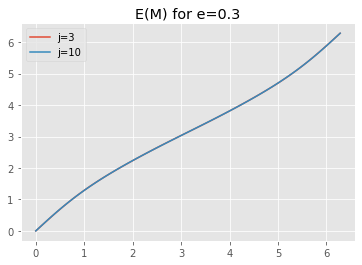

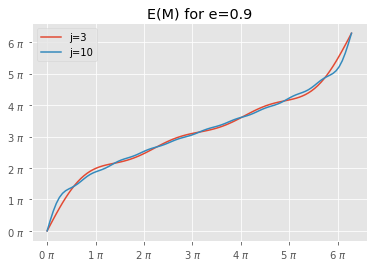

In [10]:
Mi = np.linspace(0,2*math.pi,100)

def Eps2(j,e):
    E2=[0]*len(Mi)
    r=0
    for l in range(len(Mi)):
        for t in range(1,j+1):
            E2[l]+=(2/t)*Jn(t,t*e)*np.sin(t*Mi[l])
        E2[l]+=Mi[l]
        r+=1
    return E2

plt.figure()
plt.plot(Mi,Eps2(3,0.3))
plt.plot(Mi,Eps2(10,0.3))
plt.legend(['j=3','j=10'])
plt.title('E(M) for e=0.3')
#για e=0.3 τα αποτελέσματα πάλι ταυτίζονται και φαίνεται να προσεγγίζει καλά τις τιμές του ερωτήματος 1.

plt.figure()
plt.plot(Mi,Eps2(3,0.9))
plt.plot(Mi,Eps2(10,0.9))
plt.legend(['j=3','j=10'])
plt.title('E(M) for e=0.9')
ax=plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.style.use("ggplot")
#για e=0.9 τα αποτελέσματα φαίνονται να είναι καλύτερα από το ερώτημα 2 για τα αντίστοιχα καθώς οι ταλαντώσεις είναι πολύ πιο μικρές.
#για n=10 φαίνεται να προσαρμόζονται καλύτερα
#Άρα για μεγάλες εκκεντρότητες θα προτιμούσαμε αυτόν τον τρόπο.

